In [13]:
import cv2
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:
Datadirectory = ("/kaggle/input/data-project/dataset/train") 
Classes = ["Closed_Eyes", "Opened_Eyes" ]
img_size = 224

# Create a list of training Data (non-List)
training_Data = []

#Create a function 
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory,category)
    class_num = Classes.index(category) # type 0 1,
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array= cv2.resize(backtorgb, (img_size, img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [20]:
create_training_Data()
print(len(training_Data))

4248


In [24]:
import random
random.shuffle(training_Data)

In [29]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)

# all of X , size of X(a,b) , 3 ways
X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape

(4248, 224, 224, 3)

In [30]:
X = X/255

In [32]:
Y=np.array(y)
Y.shape

(4248,)

In [33]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [34]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
optimizer='RMSprop',
metrics='accuracy')

history = model.fit(X, Y, batch_size=10, epochs=30, verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/30
383/383 [==============================] - 22s 15ms/step - loss: 0.2866 - accuracy: 0.8632 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 2/30
383/383 [==============================] - 4s 11ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 7.0051e-04 - val_accuracy: 1.0000
Epoch 3/30
383/383 [==============================] - 4s 11ms/step - loss: 0.0365 - accuracy: 0.9911 - val_loss: 6.6889e-04 - val_accuracy: 1.0000
Epoch 4/30
383/383 [==============================] - 4s 11ms/step - loss: 0.0271 - accuracy: 0.9937 - val_loss: 5.7813e-04 - val_accuracy: 1.0000
Epoch 5/30
383/383 [==============================] - 4s 11ms/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 2.4313e-04 - val_accuracy: 1.0000
Epoch 6/30
383/383 [==============================] - 4s 11ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 9.5901e-04 - val_accuracy: 1.0000
Epoch 7/30
383/383 [==============================] - 5s 12ms/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 7.8192e-

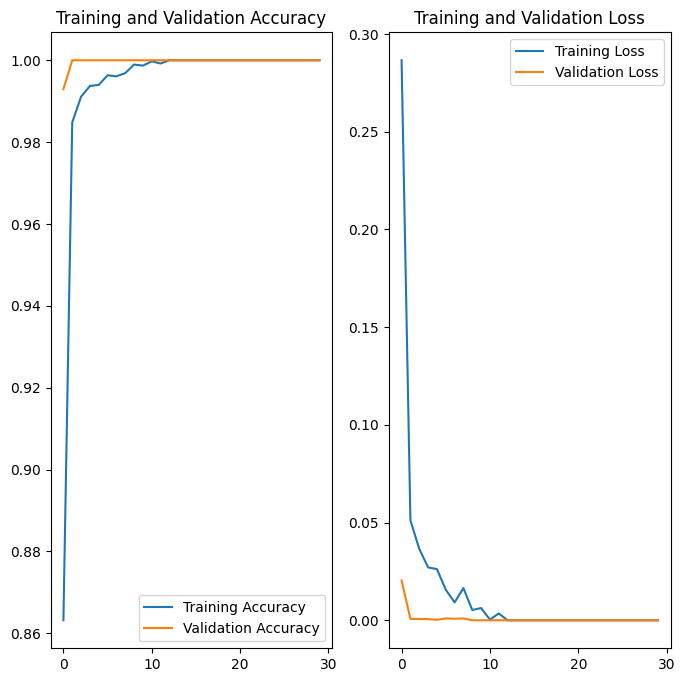

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
model.save('modelEYE_1_better.h5')
from keras.models import load_model
model = load_model('modelEYE_1_better.h5')

In [38]:
from keras.models import load_model
model = load_model('modelEYE_1_better.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    